          country          Region Surface area (km2)  \
0     Afghanistan    SouthernAsia             652864   
1         Albania  SouthernEurope              28748   
2         Algeria  NorthernAfrica            2381741   
3  American Samoa       Polynesia                199   
4         Andorra  SouthernEurope                468   

   Population in thousands (2017)  Population density (per km2, 2017)  \
0                           35530                                54.4   
1                            2930                               106.9   
2                           41318                                17.3   
3                              56                               278.2   
4                              77                               163.8   

   Sex ratio (m per 100 f, 2017)  \
0                          106.3   
1                          101.9   
2                          102.0   
3                          103.6   
4                          102.3   

   GDP:

C:\Users\bessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


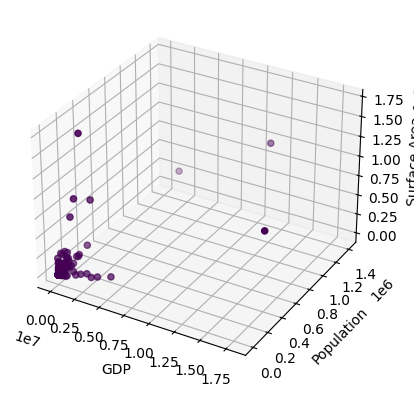

In [3]:
import pandas as pd
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv(r'C:\Users\bessa\Downloads\archive\country_profile_variables.csv')
print(df.head())


selected_features = df[['GDP: Gross domestic product (million current US$)',
                        'Population in thousands (2017)',
                        'Surface area (km2)']]


selected_features = selected_features.apply(pd.to_numeric, errors='coerce').fillna(0)


n_clusters = 3  
spectral = SpectralClustering(n_clusters=n_clusters, random_state=42)
df['cluster'] = spectral.fit_predict(selected_features)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(selected_features.iloc[:, 0], selected_features.iloc[:, 1], selected_features.iloc[:, 2], c=df['cluster'], cmap='viridis')
ax.set_xlabel('GDP')
ax.set_ylabel('Population')
ax.set_zlabel('Surface Area')
plt.show()

# Conclusion:
# After using spectral clustering on the country dataset,
# Grroups of countries with similar sizes in GDP, population, and surface area were found.
# Each group has its own characteristics. Some share similar economic and population sizes. 
# Countries that stand out from their groups, needing a closer look were also found. 
# If the groups make sense, it means the clustering worked well. Other factors like politics or geography in each group can also be analyzed. 
# These findings could help policymakers address common challenges or opportunities in specific clusters.